In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplo

In [2]:
df=pd.read_csv('Fever.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [3]:
# Preliminary analysis
df.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


In [37]:
# Preliminary analysis
df.head(5)

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [39]:
# Preliminary analysis
# Checking for any missing values.
# No missing values noticed
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [20]:
# Preliminary analysis
df[['A','B']].nunique()
# The results suggests that there are 3 levels across each factors i.e A and B ingredients.

A    3
B    3
dtype: int64

In [24]:
# Preliminary analysis
print('Value counts for A\n',df['A'].value_counts())
print('\n\nValue counts for B\n',df['B'].value_counts())

# The results suggests that among 36 treatments there are 12 observations for each of the 3 levels across both factors.

Value counts for A
 3    12
2    12
1    12
Name: A, dtype: int64


Value counts for B
 3    12
2    12
1    12
Name: B, dtype: int64


In [35]:
# Preliminary analysis
# Following crosstab gives preview of arithmetic mean of relief at the following levels
# 1. Ingredient level (i.e marginal totals->'All') corresponding to the ingredients horizontally (for A) and vertically (for B)
# 2. Treatment level in each cell at the cross section of A and B ingredients 
# 3. Grand margin at the intersection of marginal total 'All'for both the ingredients
# 4. The result also suggests that there are 9 treatment blocks with each block combining both factors at one of their 
# treatment levels. i.e 4 volunteer for each treatment * 9 different treatments = 36 treatments/observations

print(df[['A','B','Volunteer']].groupby(by=['A','B']).count())

print('\n\nCross tab between Ingredient A and B depicting treatment level arithmetic means along with marginal totals as below')
print('-------------------------------------------------------------------------------------------------------------------')
pd.crosstab(df['A'],df['B'],values=df['Relief'],aggfunc='mean',margins=True)

     Volunteer
A B           
1 1          4
  2          4
  3          4
2 1          4
  2          4
  3          4
3 1          4
  2          4
  3          4


Cross tab between Ingredient A and B depicting treatment level arithmetic means along with marginal totals as below
-------------------------------------------------------------------------------------------------------------------


B,1,2,3,All
A,,,,
1,2.475000,4.600000,4.575000,3.883333
2,5.450000,8.925000,9.125000,7.833333
3,5.975000,10.275000,13.250000,9.833333
All,4.633333,7.933333,8.983333,7.183333


<AxesSubplot:xlabel='A', ylabel='Relief'>

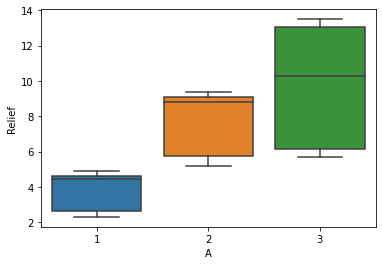

In [36]:
# Preliminary analysis
sns.boxplot(x="A", y="Relief", data=df)

<AxesSubplot:xlabel='B', ylabel='Relief'>

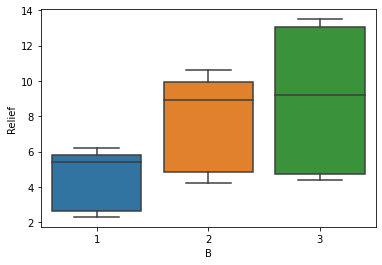

In [45]:
# Preliminary analysis
sns.boxplot(x="B", y="Relief", data=df)

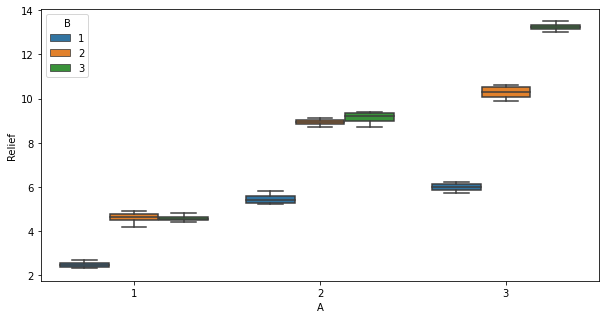

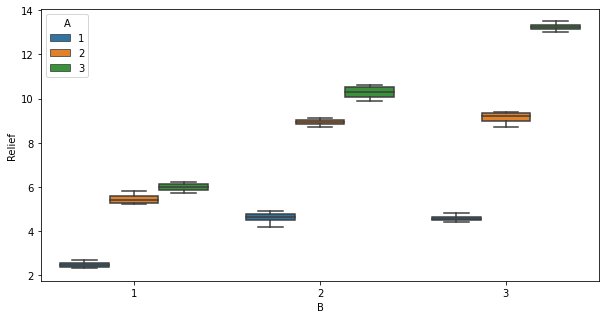

In [67]:
# Preliminary analysis
plt.figure(figsize=(10,5))
sns.boxplot(x="A", y="Relief", data=df,hue='B')
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(x="B", y="Relief", data=df,hue='A')
plt.show()

<AxesSubplot:xlabel='A'>

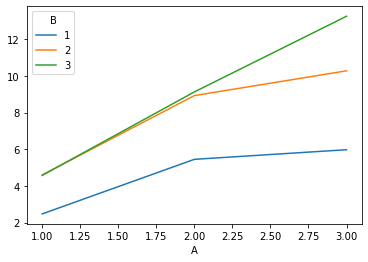

In [81]:
# Preliminary analysis
# The below plot of means across each combination of ingredient A and B across each ofthe 3 levels shows a clear distinguished
# pattern when it comes to level 3 which deviates from the trend of remaining two levels such as 1 and 2. i.e Relief seems to 
# be showing increased mean for the treatment with ingredient level 3 for both A and B. We shall test this aspect through
# interaction effect using two way ANOVA
pd.crosstab(df['A'],df['B'],values=df['Relief'],aggfunc='mean',margins=False).plot()

#1.1 Part A
Hypothesis for one way Anova on A ingredient is as below
𝐻0  : The means of 'Relief' variable with respect to each of the treatment levels for A ingredient is equal.

𝐻1  : At least one of the means of 'Relief' variable with respect to each of the treatment levels for A ingredient is unequal.

#1.1 Part B
Hypothesis for one way Anova on B ingredient is as below
𝐻0  : The means of 'Relief' variable with respect to each of the treatment levels for B ingredient is equal.

𝐻1  : At least one of the means of 'Relief' variable with respect to each of the treatment levels for B ingredient is unequal.

In [65]:
#1.2
model1=ols('Relief~C(A)',data=df).fit()
aov_table1=anova_lm(model1)
aov_table1

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.02,110.010000,23.465387,4.578242e-07
Residual,33.0,154.71,4.688182,NaN,NaN


In [ ]:
#1.2
Since the p value is less than the significance level (0.05), we can reject the null hupothesis and conclude that at least one 
of the means of 'Relief' variable with respect to each of the treatment levels for A ingredient is unequal

In [66]:
#1.3
model2=ols('Relief~C(B)',data=df).fit()
aov_table2=anova_lm(model2)
aov_table2

,df,sum_sq,mean_sq,F,PR(>F)
C(B),2.0,123.66,61.830000,8.126777,0.00135
Residual,33.0,251.07,7.608182,NaN,NaN


In [ ]:
#1.3
Since the p value is less than the significance level (0.05), we can reject the null hupothesis and conclude that at least one 
of the means of 'Relief' variable with respect to each of the treatment levels for B ingredient is unequal

#1.5
Hypothesis on 2 way ANOVA based on two factors (ingredients A and B) along with the interaction between these two factors/variables.
𝐻0  : The means of 'Relief' variable with respect to each of the ingredient levels across A and B ingredients are equal.
𝐻1  : At least one of the means of 'Relief' variable with respect to each of the ingredient levels across A and B ingredients
      is unequal.

In [64]:
#1.5
#Interaction Effect:
model3=ols('Relief~C(A)+C(B)+C(A):C(B)',data=df).fit()
aov_table3=anova_lm(model3)
aov_table3

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.020,110.010000,1827.858462,1.514043e-29
C(B),2.0,123.660,61.830000,1027.329231,3.348751e-26
C(A):C(B),4.0,29.425,7.356250,122.226923,6.972083e-17
Residual,27.0,1.625,0.060185,NaN,NaN


In [ ]:
#1.5
1.Since the p value in both of the above scenarios are less than  𝛼  (0.05), we can say that we reject the null hypothesis ( 𝐻0 ).
2.Meaning at least one of the means of 'Relief' variable with respect to each of the ingredient levels across A and B ingredients
      is unequal.

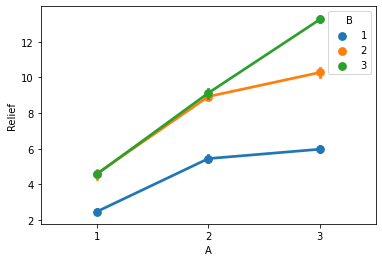

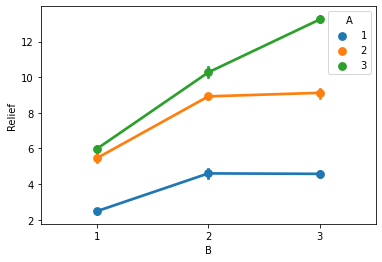

In [61]:
#1.4
# Below depicts the interaction between factors A and B towards relief
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=df,ci=95)
plt.show()
sns.pointplot(x = 'B', y = 'Relief', hue='A',data=df,ci=95)
plt.show()

#1.4
Based on the interaction plot above there seems to be some interaction effect between A and B on the dependent variable relief as
we can see the lines are not parallel between A2 and A3 within the range of B2 and B3.
That is A3 and B3 seems to be have increased effect on the release going by the plot above.